# EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train_data.replace(
    -1, np.NaN, inplace=True
)  # Судя по описанию данных, -1 означает пропуск в данных. Заменим -1 на более понятный NaN

In [5]:
import seaborn as sns

sns.set(rc={"figure.figsize": (20, 8)})

## Анализ таргета

In [6]:
pd.DataFrame(train_data.groupby("target").id.count())

,id
target,
0,573518
1,21694


Text(0.5, 1.0, 'Распределение таргета')

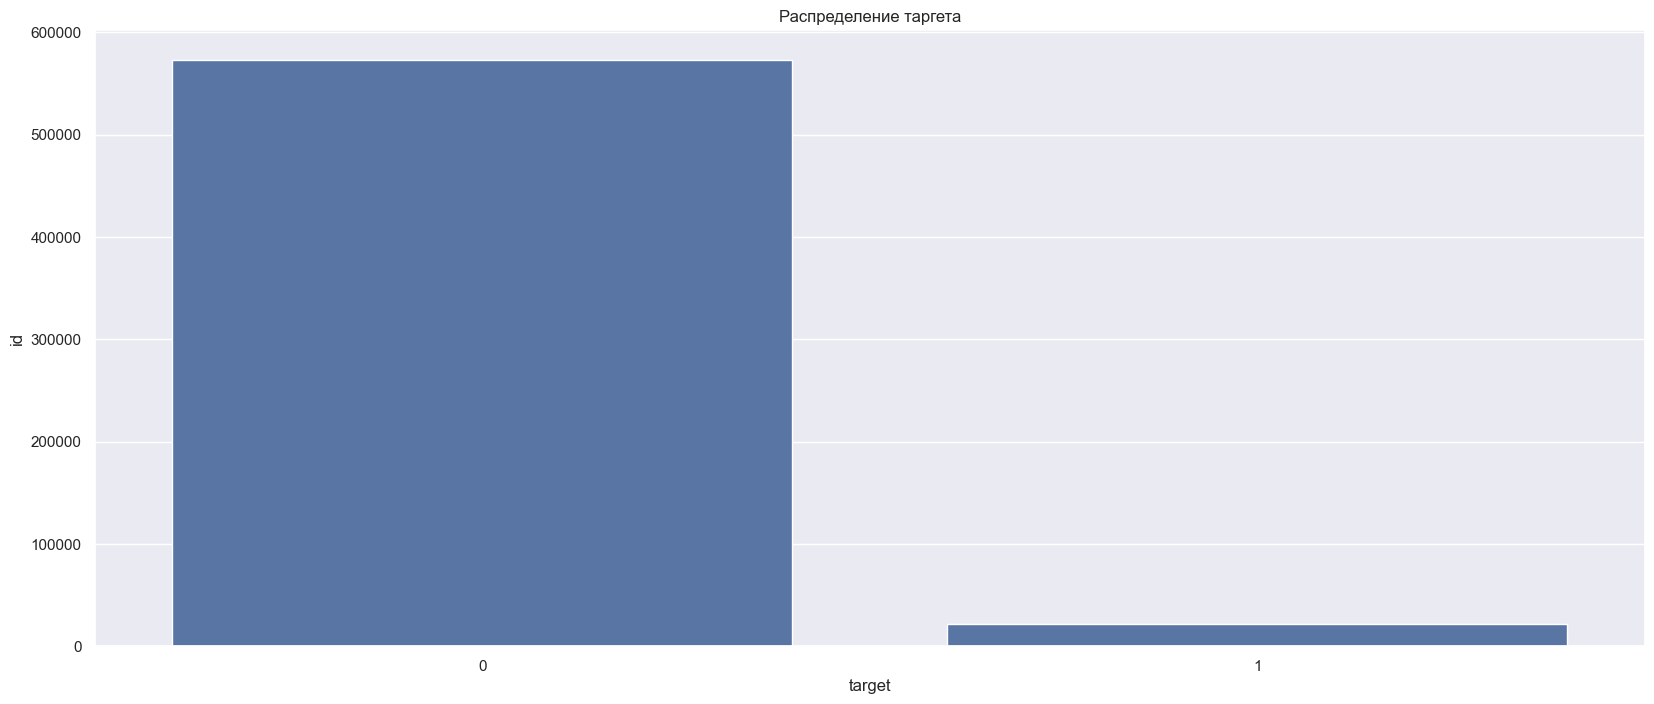

In [7]:
sns.barplot(
    x="target",
    y="id",
    data=pd.DataFrame(train_data.groupby("target").id.count().reset_index()),
).set_title("Распределение таргета")

Видим крайне неравномерное распределение таргета - класс "0" примерно в 26 раз больше, чем класс "1"

## Анализ фичей

Судя по описанию данных, постфиксы в названиях указывают на следующие типы данных:
- bin - бинарная фича
- cat - категориальная фича
- отсутсвие постфикса - численная фича

Временные метки отсутствуют

In [8]:
# Разбиение фичей по группам
numeric_features = [
    "ps_ind_01",
    "ps_ind_03",
    "ps_ind_14",
    "ps_ind_15",
    "ps_reg_01",
    "ps_reg_02",
    "ps_reg_03",
    "ps_car_11",
    "ps_car_12",
    "ps_car_13",
    "ps_car_14",
    "ps_car_15",
    "ps_calc_01",
    "ps_calc_02",
    "ps_calc_03",
    "ps_calc_04",
    "ps_calc_05",
    "ps_calc_06",
    "ps_calc_07",
    "ps_calc_08",
    "ps_calc_09",
    "ps_calc_10",
    "ps_calc_11",
    "ps_calc_12",
    "ps_calc_13",
    "ps_calc_14",
]
categorical_features = [
    "ps_ind_02_cat",
    "ps_ind_04_cat",
    "ps_ind_05_cat",
    "ps_car_01_cat",
    "ps_car_02_cat",
    "ps_car_03_cat",
    "ps_car_04_cat",
    "ps_car_05_cat",
    "ps_car_06_cat",
    "ps_car_07_cat",
    "ps_car_08_cat",
    "ps_car_09_cat",
    "ps_car_10_cat",
    "ps_car_11_cat",
]
binary_features = [
    "ps_ind_06_bin",
    "ps_ind_07_bin",
    "ps_ind_08_bin",
    "ps_ind_09_bin",
    "ps_ind_10_bin",
    "ps_ind_11_bin",
    "ps_ind_12_bin",
    "ps_ind_13_bin",
    "ps_ind_16_bin",
    "ps_ind_17_bin",
    "ps_ind_18_bin",
    "ps_calc_15_bin",
    "ps_calc_16_bin",
    "ps_calc_17_bin",
    "ps_calc_18_bin",
    "ps_calc_19_bin",
    "ps_calc_20_bin",
]

### Пропуски в данных

In [9]:
missed_count_df = pd.DataFrame(train_data.count())
missed_count_df["missed_count"] = len(train_data) - train_data.count()
missed_count_df["missed_percentage"] = (
    missed_count_df["missed_count"] / len(train_data) * 100
)
missed_count_df.reset_index(inplace=True)

In [10]:
missed_count_df.columns = ["feature", "count", "missed_count", "missed_percentage"]

In [11]:
missed_count_df

,feature,count,missed_count,missed_percentage
0,id,595212,0,0.000000
1,target,595212,0,0.000000
2,ps_ind_01,595212,0,0.000000
3,ps_ind_02_cat,594996,216,0.036290
4,ps_ind_03,595212,0,0.000000
5,ps_ind_04_cat,595129,83,0.013945
6,ps_ind_05_cat,589403,5809,0.975955
7,ps_ind_06_bin,595212,0,0.000000
8,ps_ind_07_bin,595212,0,0.000000
9,ps_ind_08_bin,595212,0,0.000000


С учетом количества фичей посмотрим визуально только на те, где есть пропуски

In [12]:
missed_count_df = missed_count_df.query("missed_count > 0")

In [13]:
missed_count_df.reset_index()

,index,feature,count,missed_count,missed_percentage
0,3,ps_ind_02_cat,594996,216,0.036290
1,5,ps_ind_04_cat,595129,83,0.013945
2,6,ps_ind_05_cat,589403,5809,0.975955
3,22,ps_reg_03,487440,107772,18.106490
4,23,ps_car_01_cat,595105,107,0.017977
5,24,ps_car_02_cat,595207,5,0.000840
6,25,ps_car_03_cat,183981,411231,69.089837
7,27,ps_car_05_cat,328661,266551,44.782531
8,29,ps_car_07_cat,583723,11489,1.930237
9,31,ps_car_09_cat,594643,569,0.095596


#### Посмотрим визуально на количественное и процентное распределение

Text(0.5, 1.0, 'Пропущенные значения (количество)')

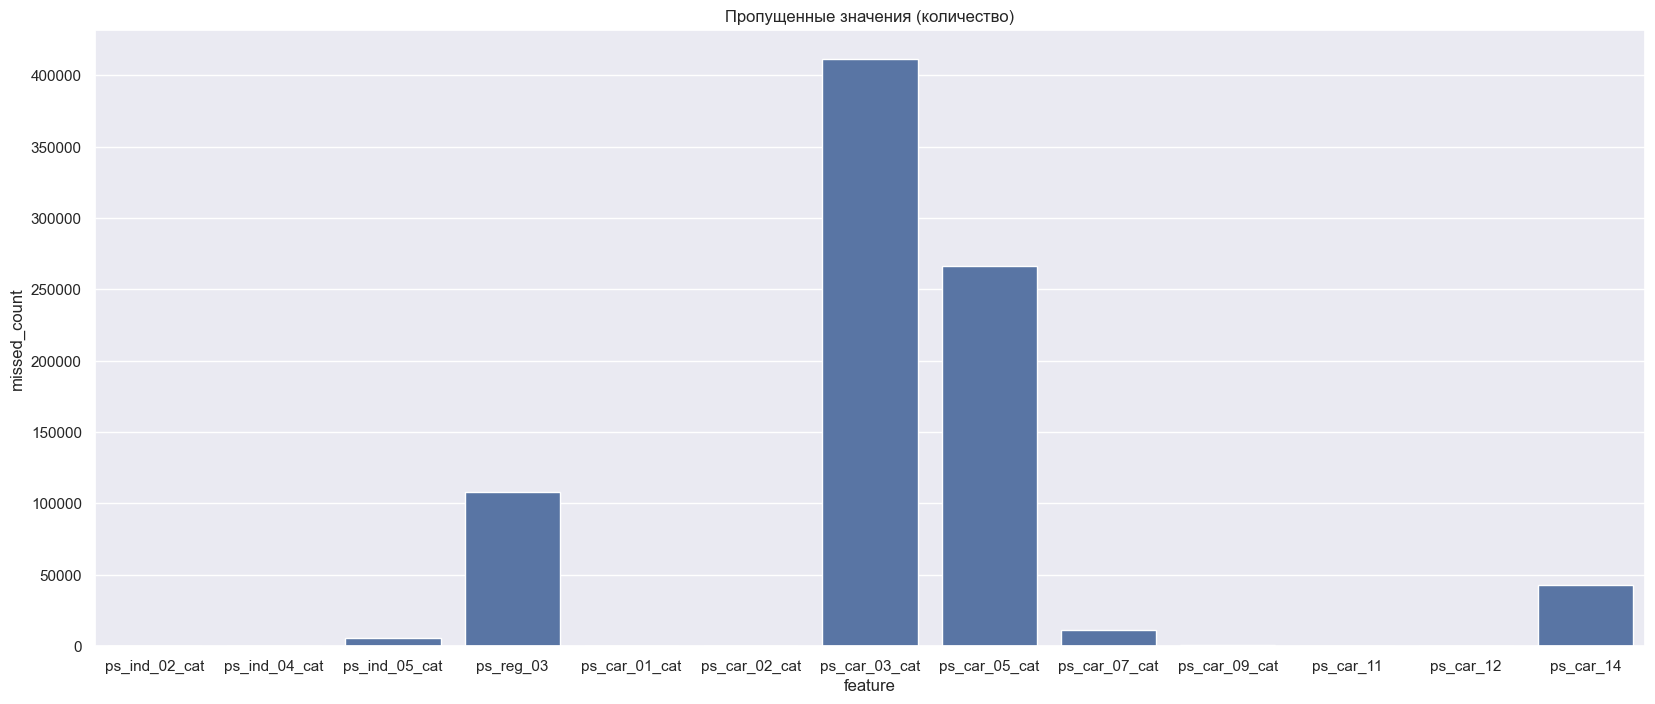

In [14]:
sns.barplot(x="feature", y="missed_count", data=missed_count_df).set_title(
    "Пропущенные значения (количество)"
)

Text(0.5, 1.0, 'Пропущенные значения (проценты)')

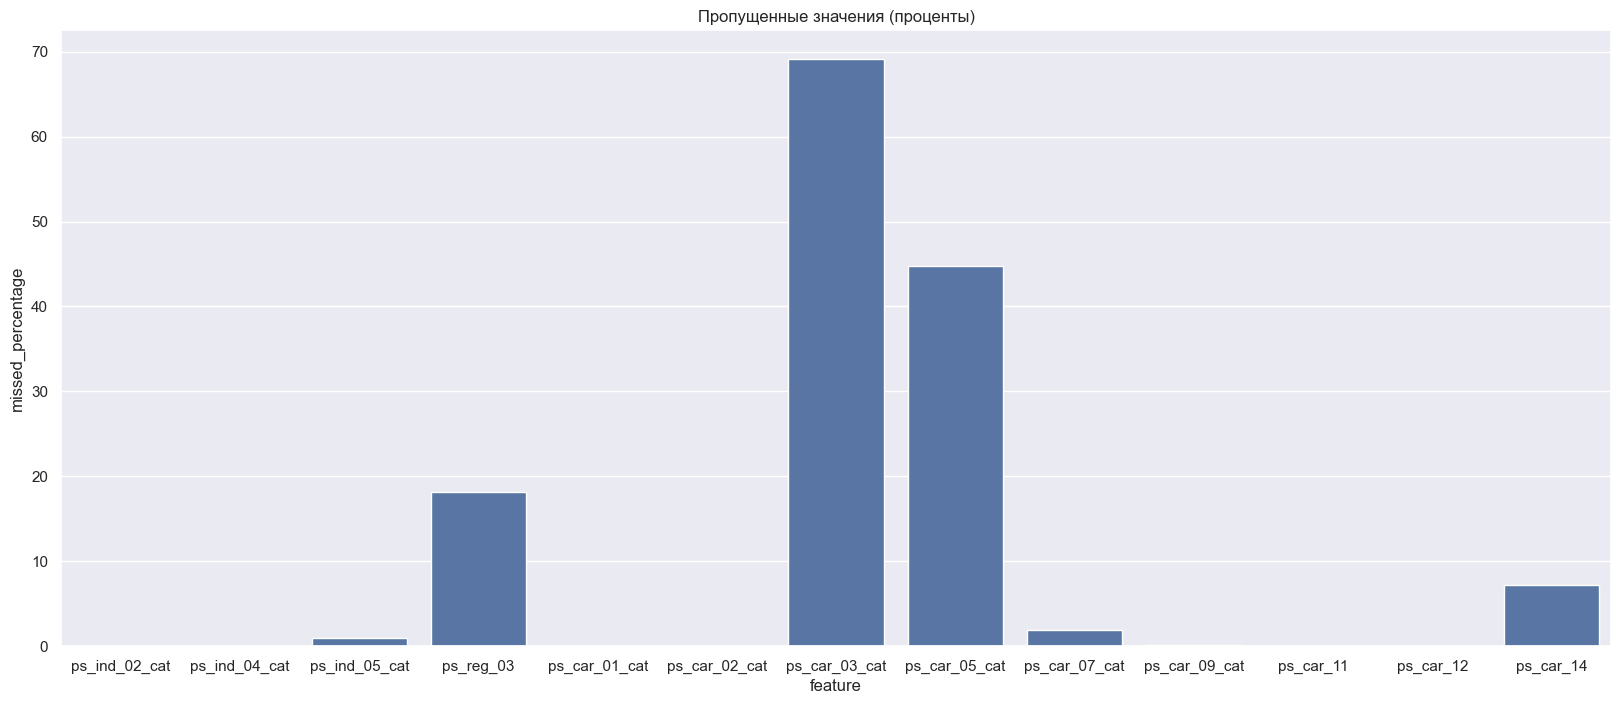

In [15]:
sns.barplot(x="feature", y="missed_percentage", data=missed_count_df).set_title(
    "Пропущенные значения (проценты)"
)

## Анализ корреляции между признаками

In [16]:
corr_matrix = train_data.drop("id", axis=1).corr()

In [17]:
corr_matrix

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.005574,0.008360,0.010146,0.032254,-0.034017,0.034218,0.013147,-0.008237,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001917,0.223408,0.066691,0.010009,-0.277458,0.005700,0.188583,0.162800,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.005574,-0.001917,1.000000,-0.061690,0.146363,-0.007712,-0.126147,0.016322,0.031194,0.110553,...,0.000127,-0.000958,-0.000946,-0.000623,-0.000209,0.000865,0.000600,0.001117,0.000150,-0.002210
ps_ind_03,0.008360,0.223408,-0.061690,1.000000,-0.096533,0.038112,-0.045158,-0.060368,0.014037,0.111306,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.010146,0.066691,0.146363,-0.096533,1.000000,0.012547,-0.298061,0.305131,0.045171,-0.011417,...,-0.001991,-0.000869,0.000263,0.001510,0.002719,0.002226,0.000803,0.000982,-0.002017,0.001222
ps_ind_05_cat,0.032254,0.010009,-0.007712,0.038112,0.012547,1.000000,0.010826,-0.010384,0.004186,-0.005918,...,-0.001514,0.001154,0.001441,0.002225,0.001552,-0.000398,0.000068,0.000007,0.000177,0.000526
ps_ind_06_bin,-0.034017,-0.277458,-0.126147,-0.045158,-0.298061,0.010826,1.000000,-0.474009,-0.356838,-0.384345,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.034218,0.005700,0.016322,-0.060368,0.305131,-0.010384,-0.474009,1.000000,-0.260438,-0.280513,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,0.013147,0.188583,0.031194,0.014037,0.045171,0.004186,-0.356838,-0.260438,1.000000,-0.211173,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995
ps_ind_09_bin,-0.008237,0.162800,0.110553,0.111306,-0.011417,-0.005918,-0.384345,-0.280513,-0.211173,1.000000,...,0.000072,0.000664,0.001439,-0.000389,-0.000621,0.001059,0.001135,0.000815,-0.001103,-0.000123


<Axes: >

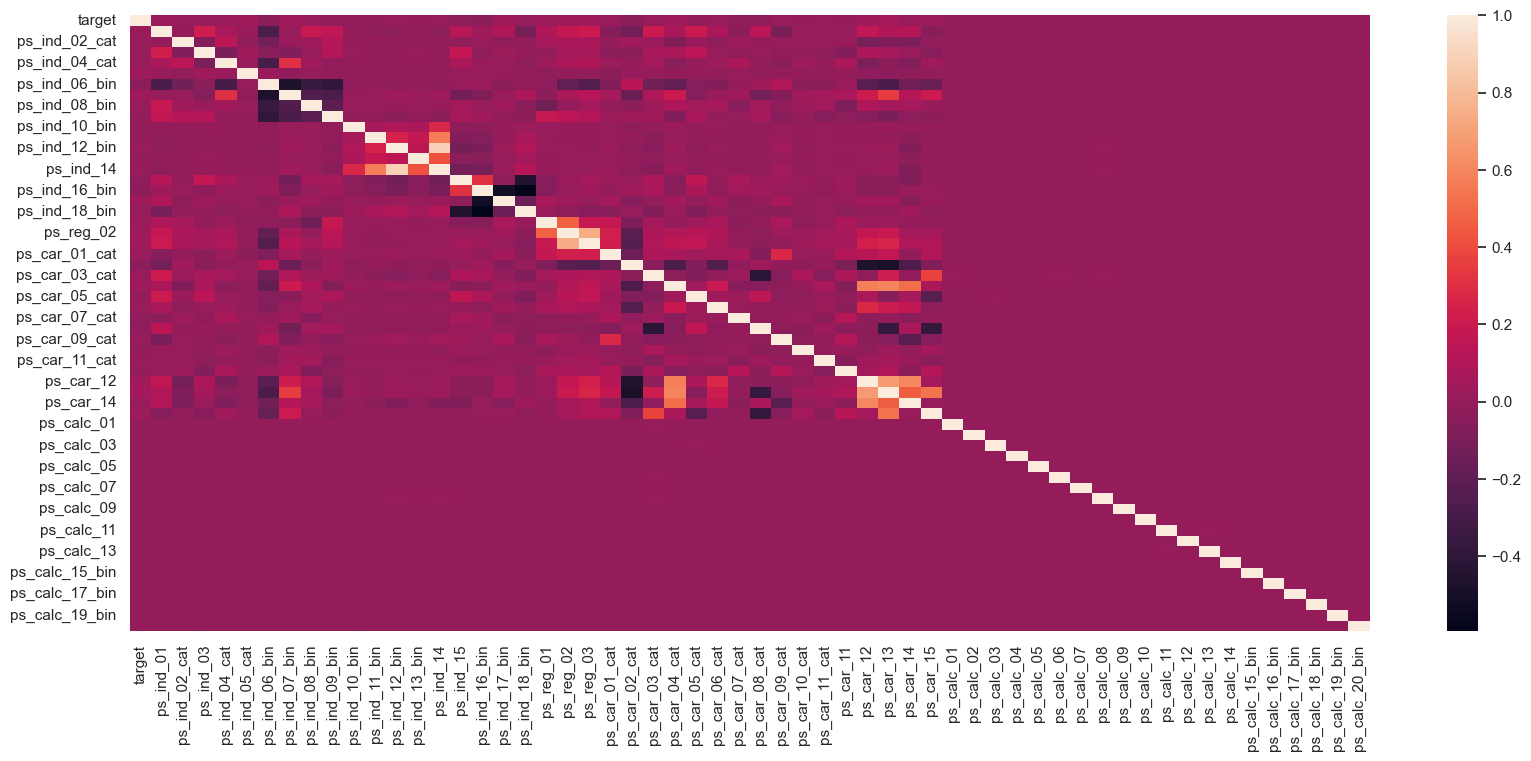

In [18]:
sns.heatmap(corr_matrix)

Теперь посмотрим на самые коррелирующие между собой фичи (возьмем threshold в 0.5)

In [19]:
correlation_pairs = corr_matrix[abs(corr_matrix) > 0.5].stack().reset_index()
correlation_pairs = correlation_pairs[
    correlation_pairs["level_0"] != correlation_pairs["level_1"]
]  # Исключение пары с одинаковыми столбцами
correlation_pairs = correlation_pairs.dropna()  # Удаление пустых значений
correlation_pairs = correlation_pairs.rename(
    columns={"level_0": "Фича 1", "level_1": "Фича 2", 0: "Корреляция"}
)

In [20]:
correlation_pairs

,Фича 1,Фича 2,Корреляция
12,ps_ind_11_bin,ps_ind_14,0.564903
14,ps_ind_12_bin,ps_ind_14,0.890127
16,ps_ind_14,ps_ind_11_bin,0.564903
17,ps_ind_14,ps_ind_12_bin,0.890127
21,ps_ind_16_bin,ps_ind_17_bin,-0.518076
22,ps_ind_16_bin,ps_ind_18_bin,-0.594265
23,ps_ind_17_bin,ps_ind_16_bin,-0.518076
25,ps_ind_18_bin,ps_ind_16_bin,-0.594265
29,ps_reg_02,ps_reg_03,0.742668
30,ps_reg_03,ps_reg_02,0.742668


А также отдельно посмотрим на корреляцию фичей с таргетом

In [21]:
correlation_with_target = pd.DataFrame(
    train_data.drop("id", axis=1).corrwith(train_data["target"])
).reset_index()
correlation_with_target.columns = ["feature", "correlation"]
correlation_with_target = correlation_with_target.query('feature != "target"')
correlation_with_target.sort_values(by="correlation", inplace=True)

In [22]:
correlation_with_target

,feature,correlation
6,ps_ind_06_bin,-0.034017
23,ps_car_02_cat,-0.031545
16,ps_ind_16_bin,-0.027778
15,ps_ind_15,-0.021506
29,ps_car_08_cat,-0.020342
28,ps_car_07_cat,-0.019735
9,ps_ind_09_bin,-0.008237
56,ps_calc_19_bin,-0.001744
33,ps_car_11,-0.001220
49,ps_calc_12,-0.001133


С учетом количества столбцов посмотрим на корреляцию в виде гистограммы

<Axes: xlabel='correlation', ylabel='Count'>

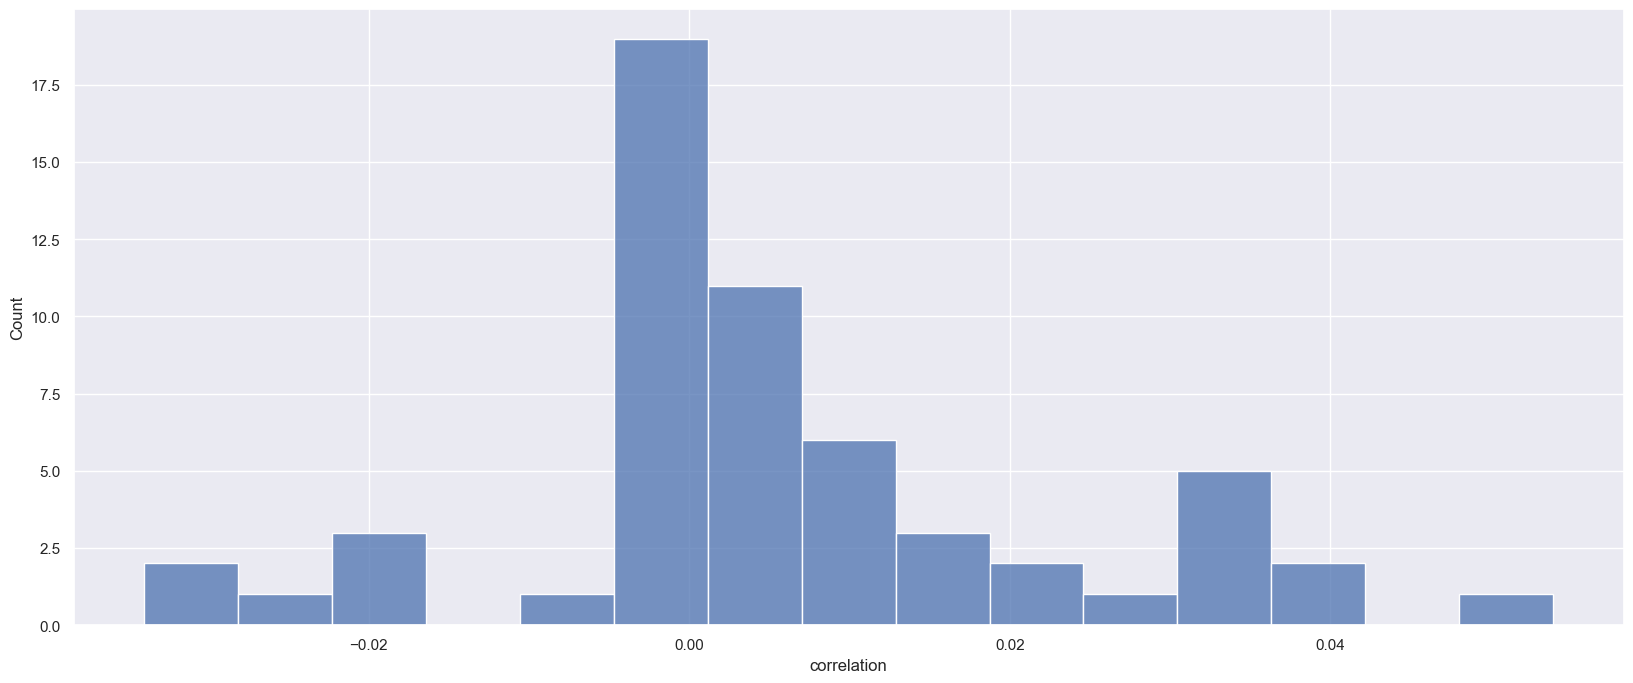

In [23]:
sns.histplot(data=correlation_with_target, x="correlation")

Как мы видим - все фичи достаточно слабо коррелируют с таргетом

## Анализ аномальных значений (для численных фичей)

In [24]:
train_data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [25]:
numerical_df = train_data[numeric_features]

In [26]:
n_cols = len(numerical_df.columns)

In [27]:
numerical_df.describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,487440.000000,595207.000000,595211.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.894047,2.346100,0.379947,0.813265,...,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.287643,0.404264,0.345413,0.832495,0.058300,0.224588,...,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.633443,2.000000,0.316228,0.670867,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.801561,3.000000,0.374166,0.765811,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.083974,3.000000,0.400000,0.906190,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [28]:
df_melted = pd.melt(numerical_df)

In [29]:
df_melted.columns = ["feature", "value"]

In [30]:
sns.set(rc={"figure.figsize": (25, 20)})

Text(0.5, 1.0, 'Распределение значений непрерывных фичей')

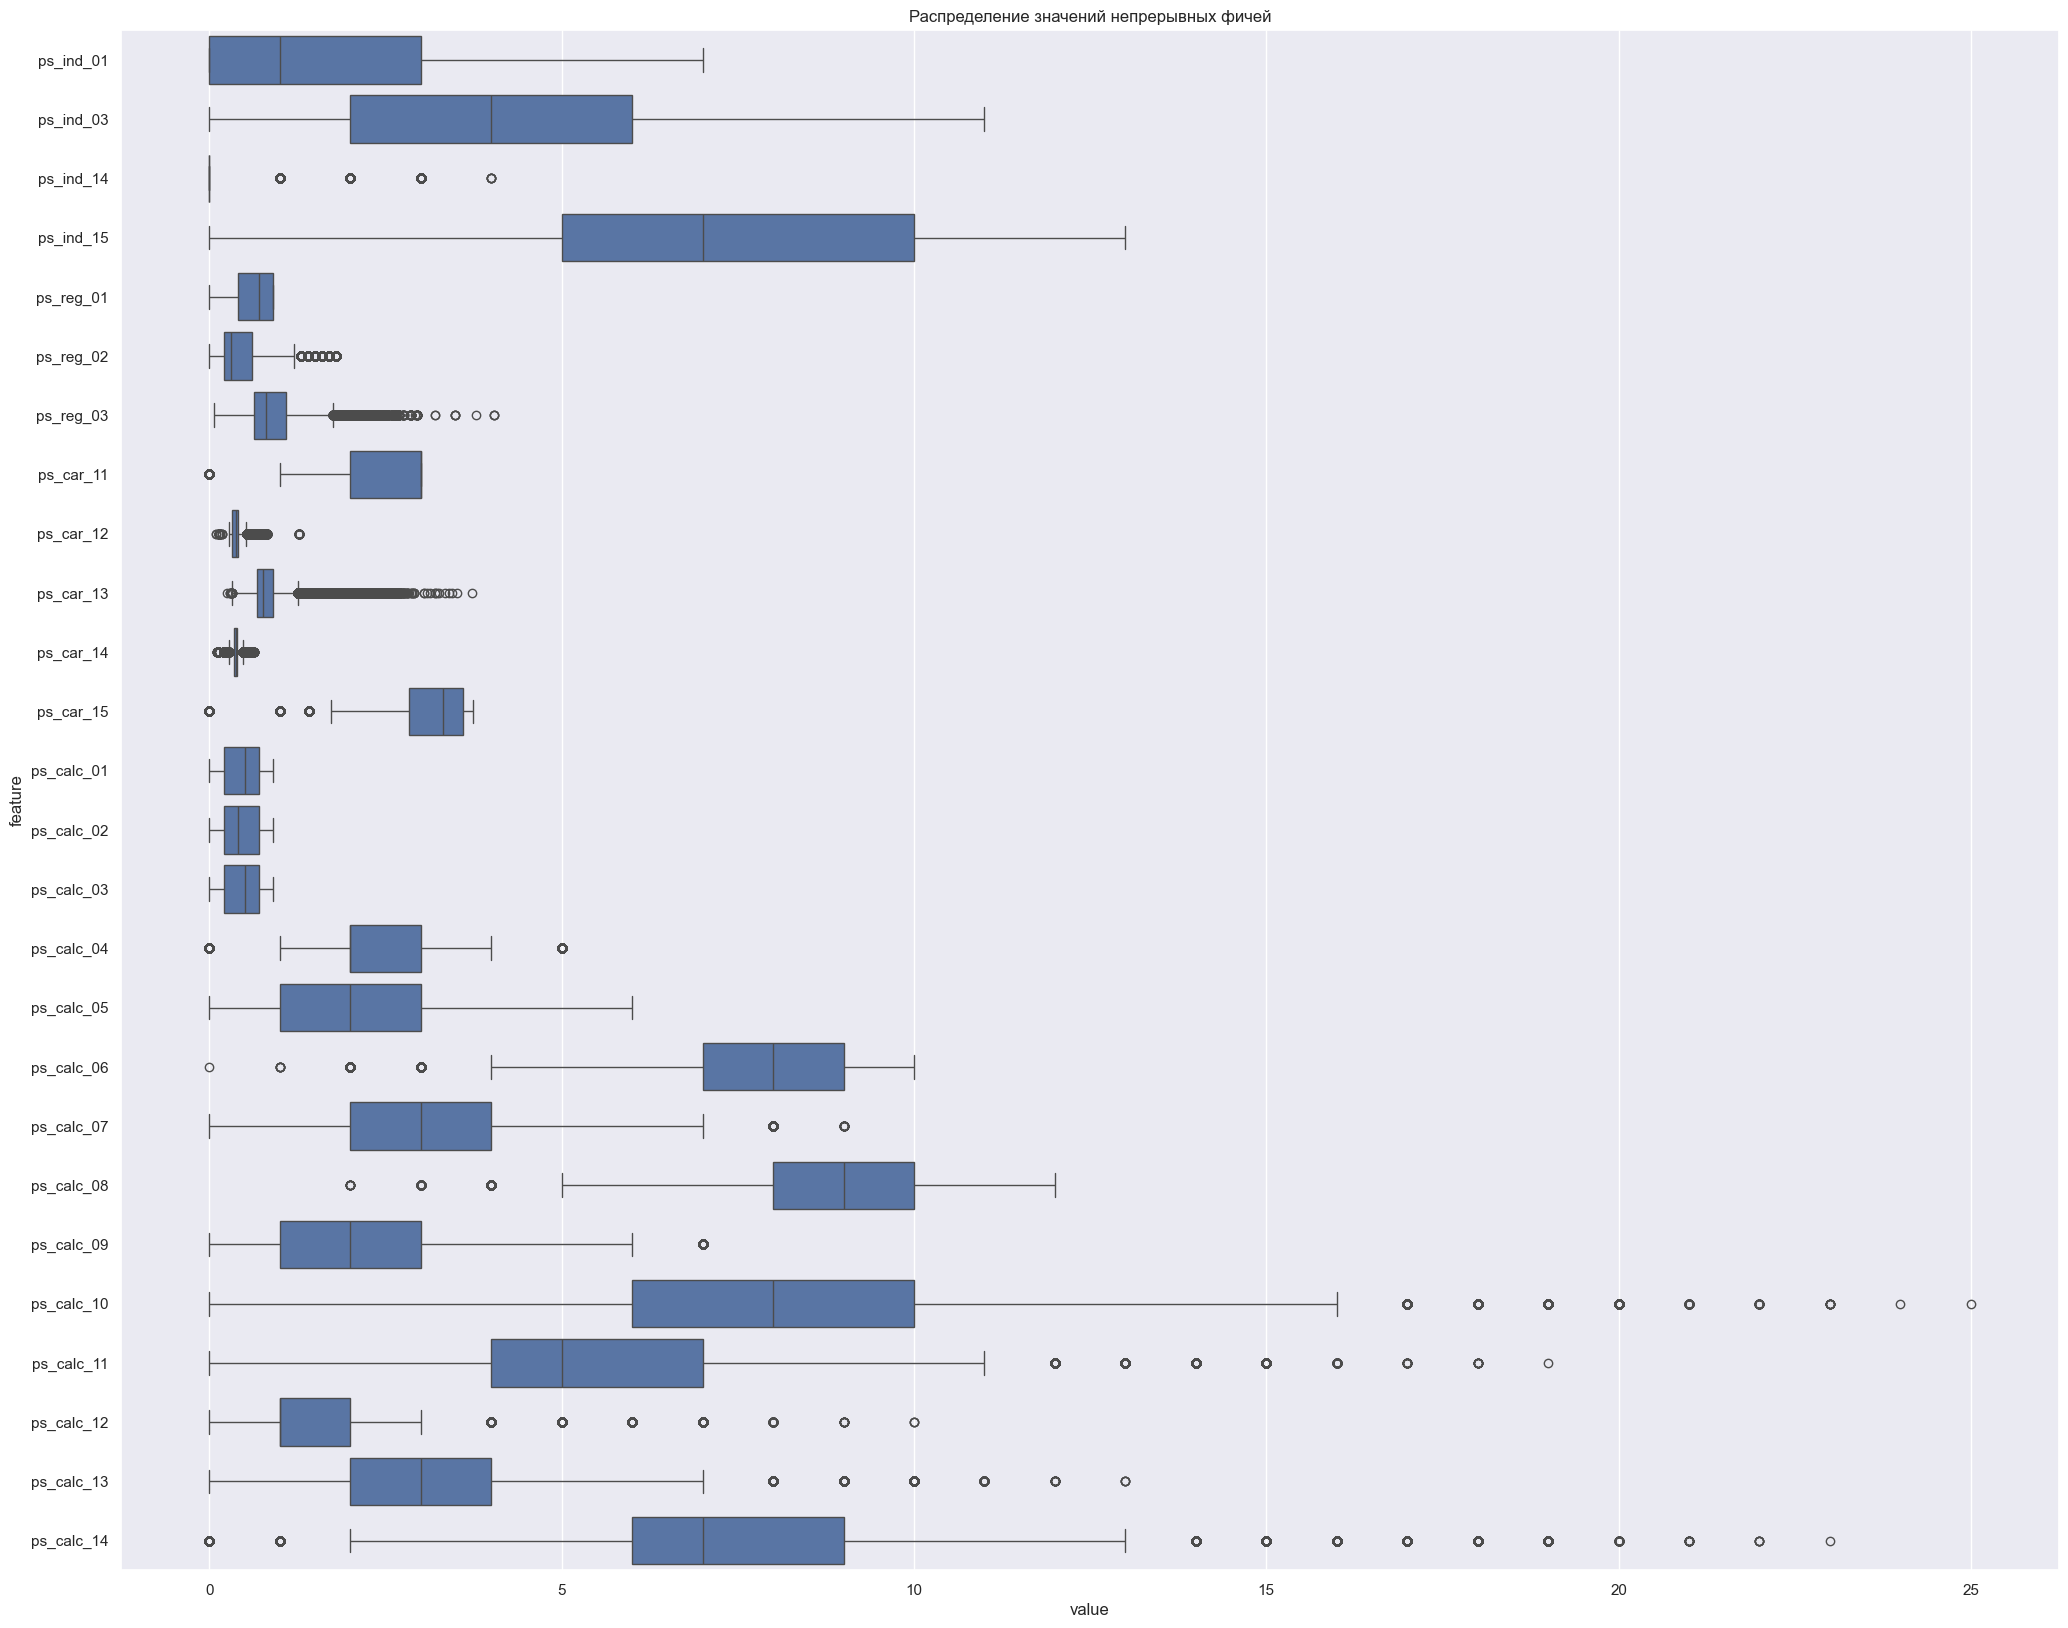

In [31]:
sns.boxplot(x="value", y="feature", data=df_melted).set_title(
    "Распределение значений непрерывных фичей"
)

Как видно по графику - исходное описание данных может быть неточным, т.к. четко различимы фичи, которые указаны в описании как числовые, но по факту очень похожи на категориальные (как минимум они содержат дискретный набор целочисленных значений). Также видно, что в некоторых фичах есть выбросы. На всякий случай проверим категориальные и бинарные фичи на предмет соответствия категориям, а также в целом на распределение этих фичей

## Анализ значений для бинарных фичей

In [32]:
binary_df = train_data[binary_features]
melted_binary_df = binary_df.melt(value_vars=binary_df.columns)
melted_binary_df.columns = ["feature", "value"]

Text(0.5, 1.0, 'Распределение значений бинарных фичей')

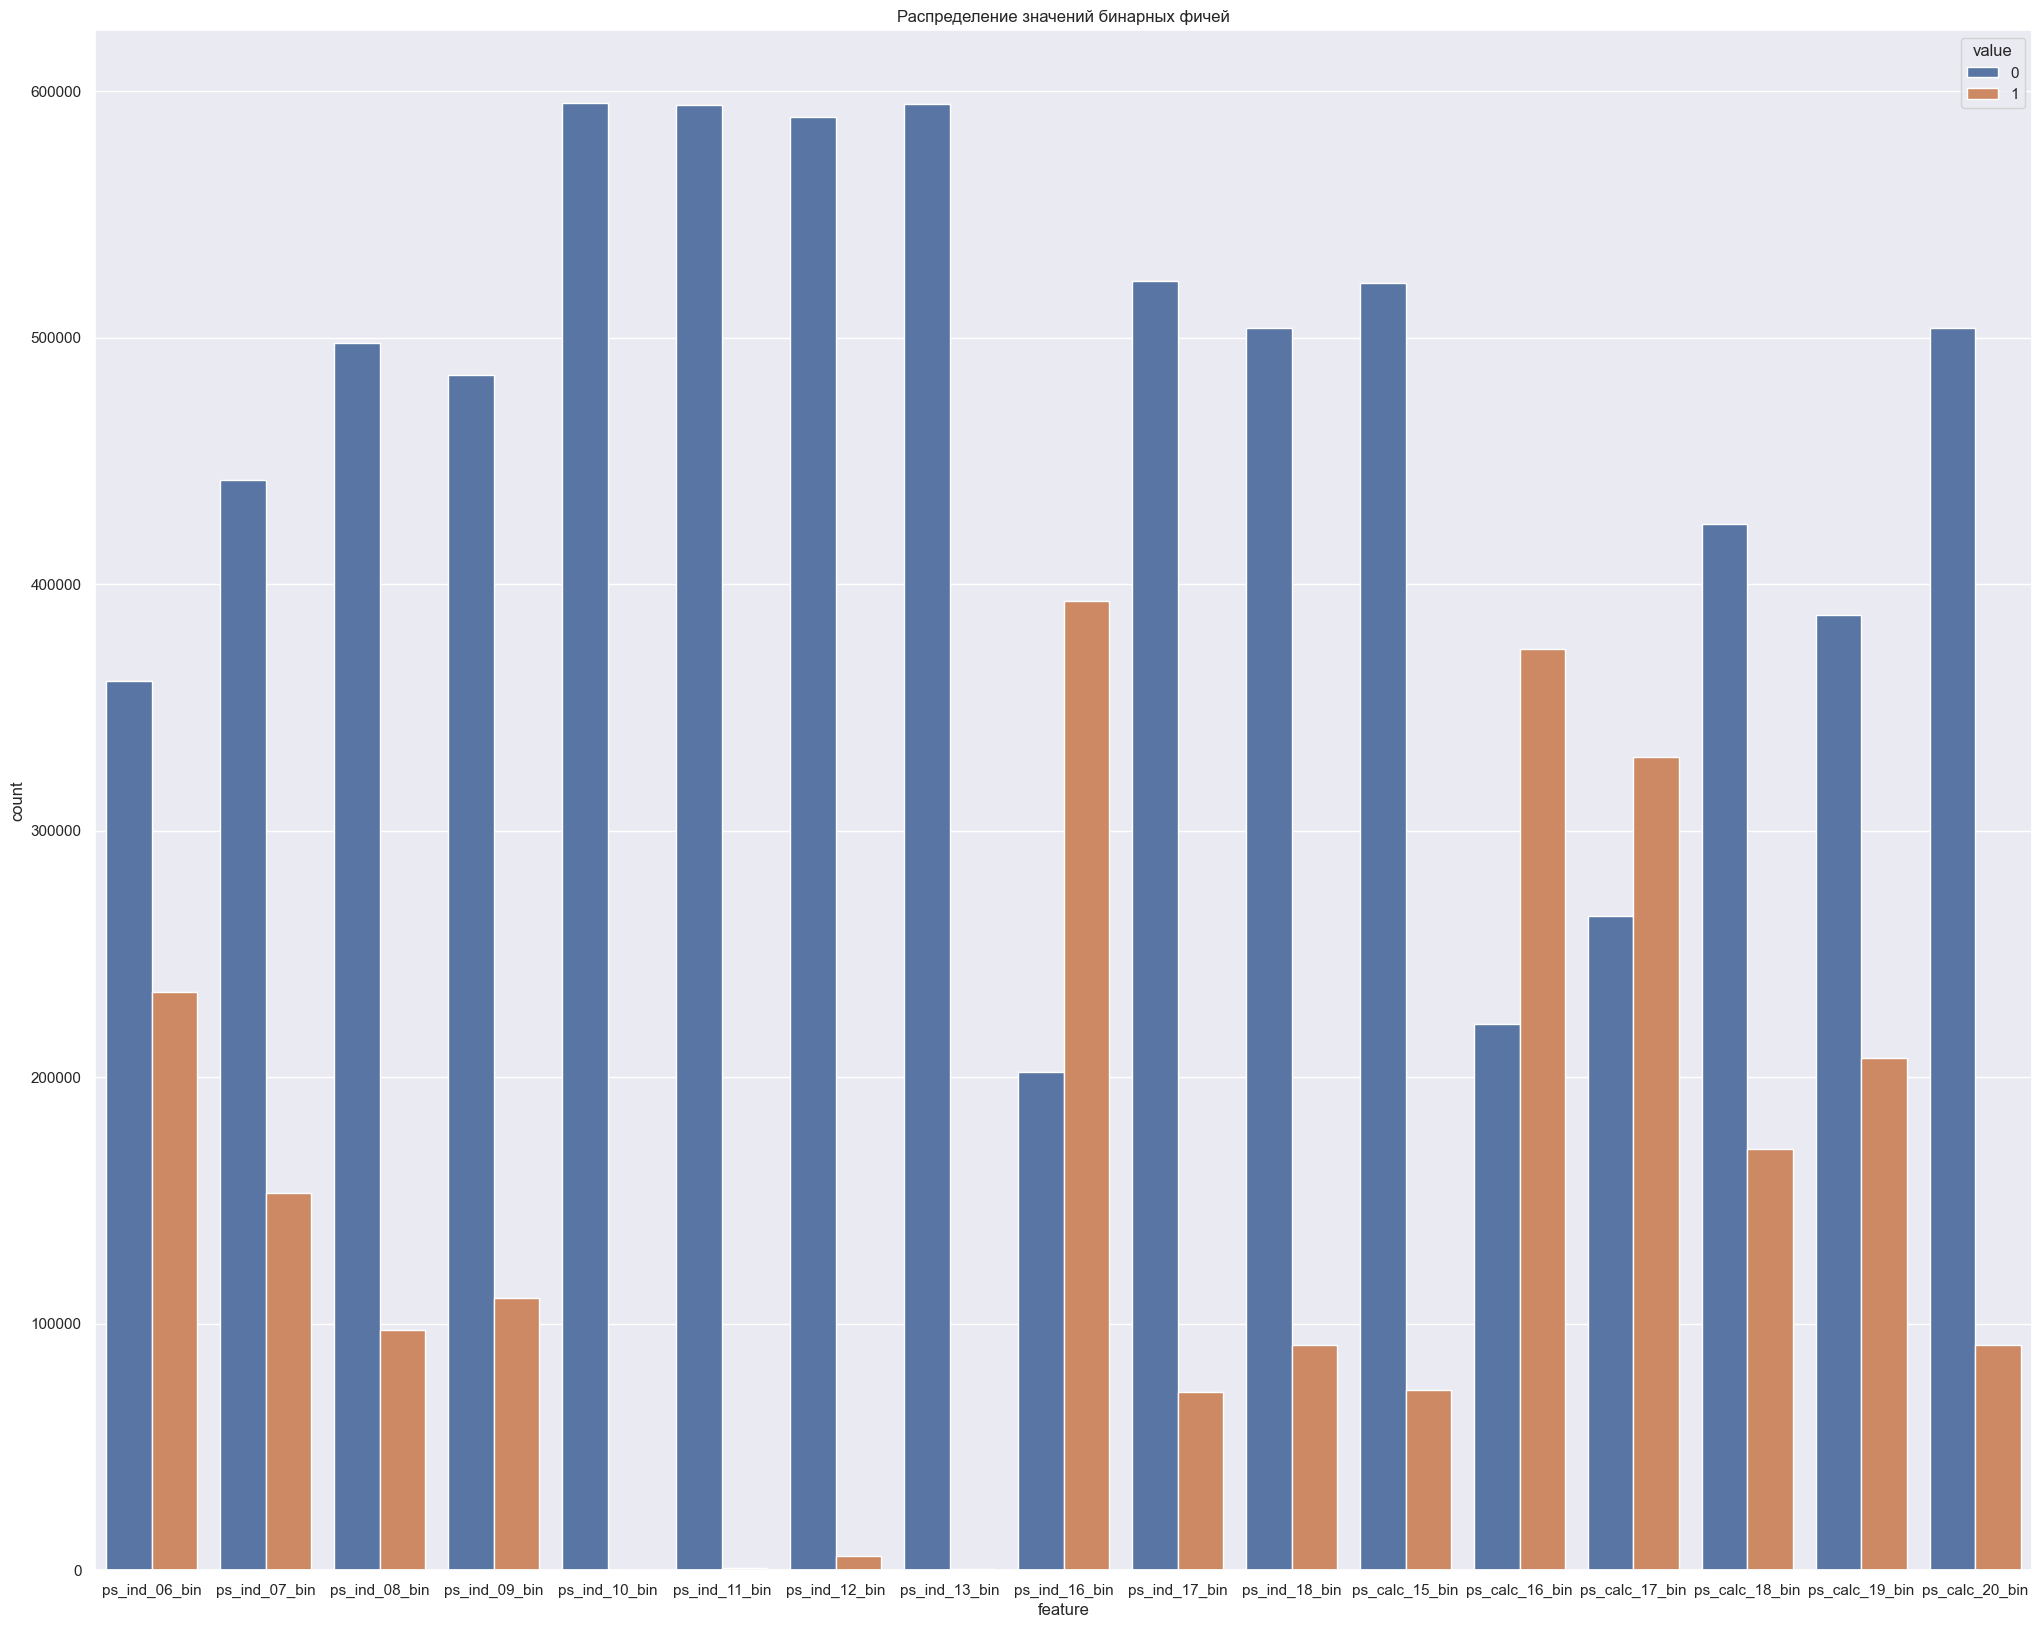

In [33]:
sns.countplot(data=melted_binary_df, x='feature', hue='value').set_title(
    "Распределение значений бинарных фичей"
)

Видим, что разметка бинарный фичей корректная, фичи действительно бинарные. Посмотрим более подробно на фичи, где нет стобца со значением 1

In [34]:
binary_df.ps_ind_10_bin.sum()

222

In [35]:
binary_df.ps_ind_11_bin.sum()

1007

In [36]:
binary_df.ps_ind_13_bin.sum()

564

Значения, равные 1, все таки присутствуют, но их просто очень мало для отображения на графике

## Анализ категориальных фичей

In [37]:
import matplotlib.pyplot as plt

In [38]:
categorical_df = train_data[categorical_features]

В случае с категориальными фичами немного неудобно будет стоить единый график для всех, поэтому построим для каждой фичи график

In [39]:
melted_categorical_df = categorical_df.melt(var_name='feature', value_name='value')

In [40]:
value_counts_per_feature = pd.DataFrame(melted_categorical_df.reset_index().groupby(['feature','value']).index.count()).reset_index()

In [41]:
value_counts_per_feature.columns = ['feature','value','count']

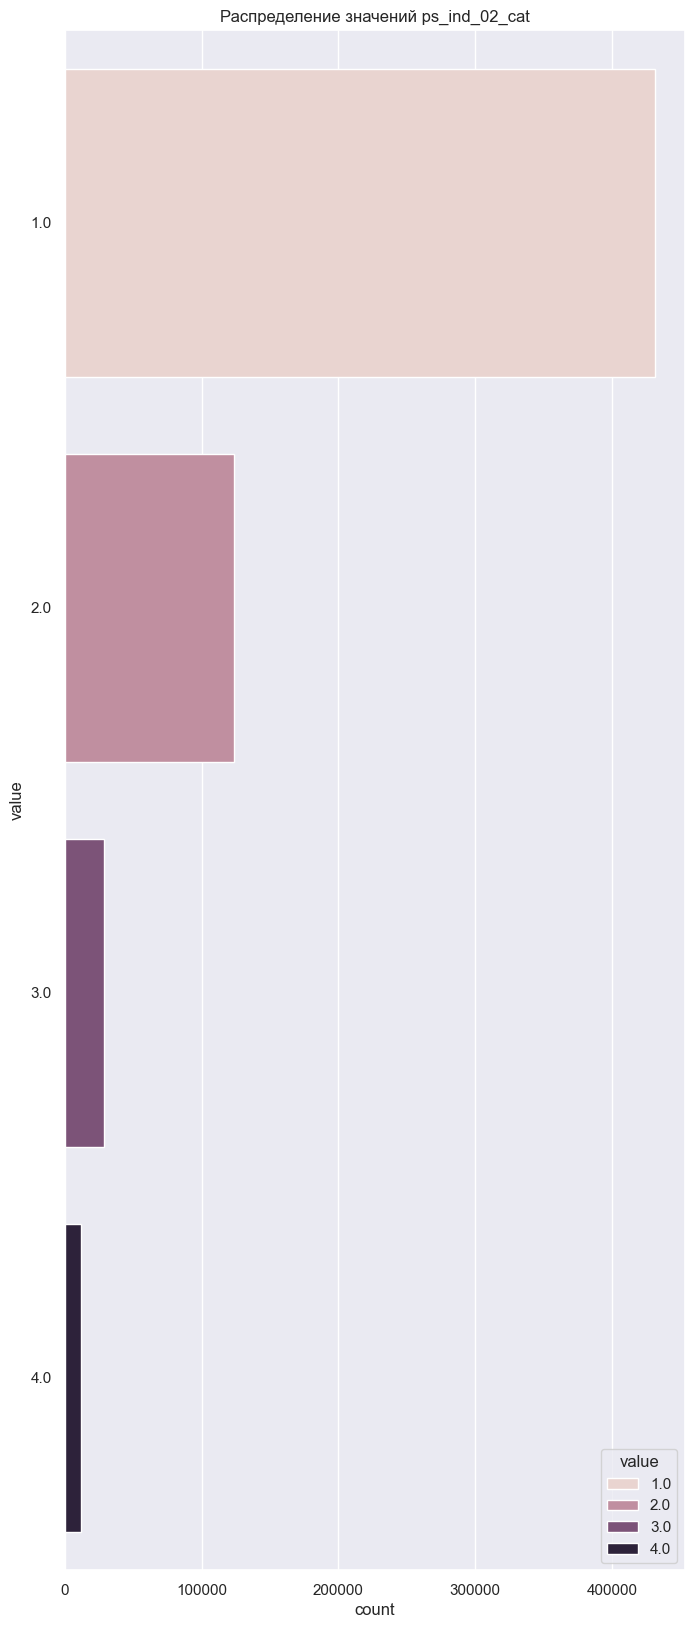

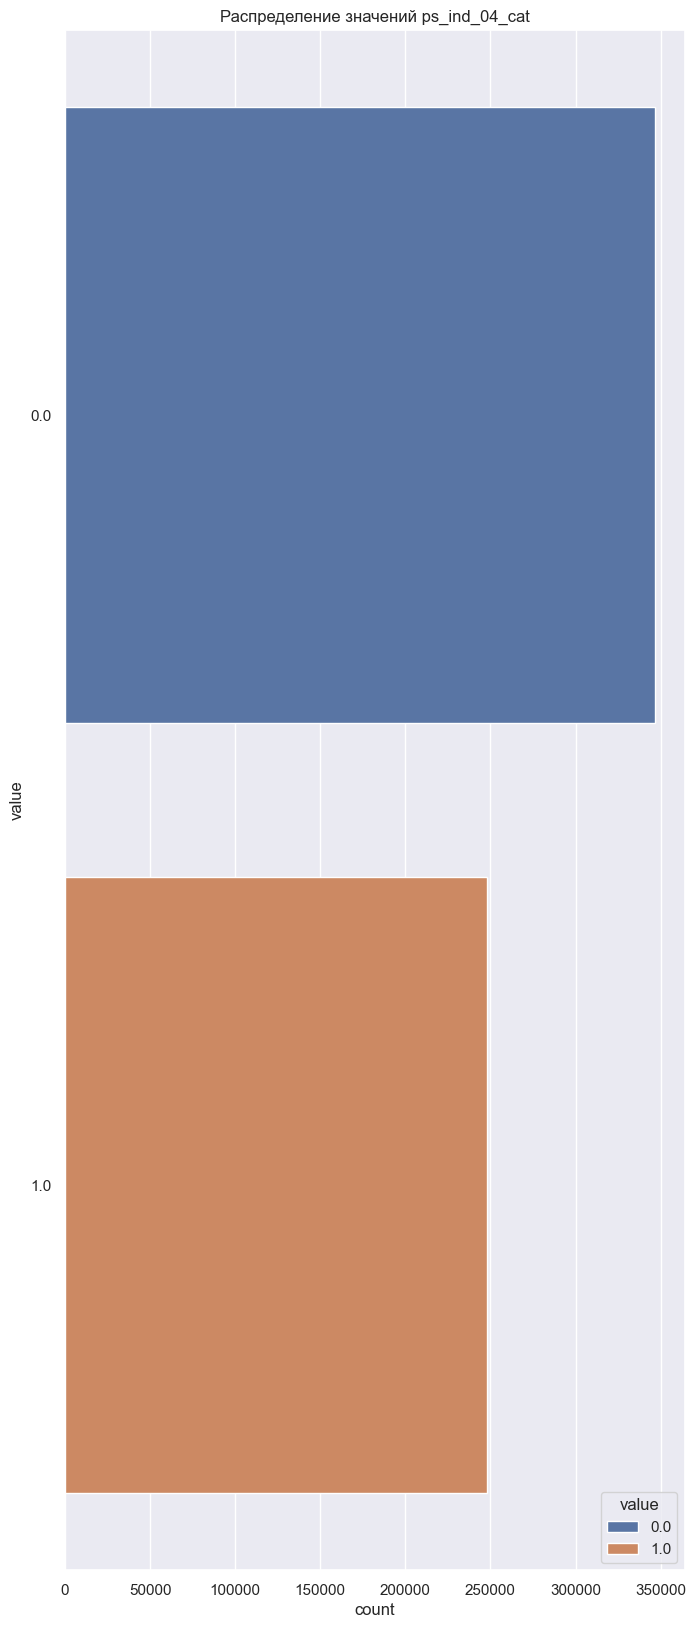

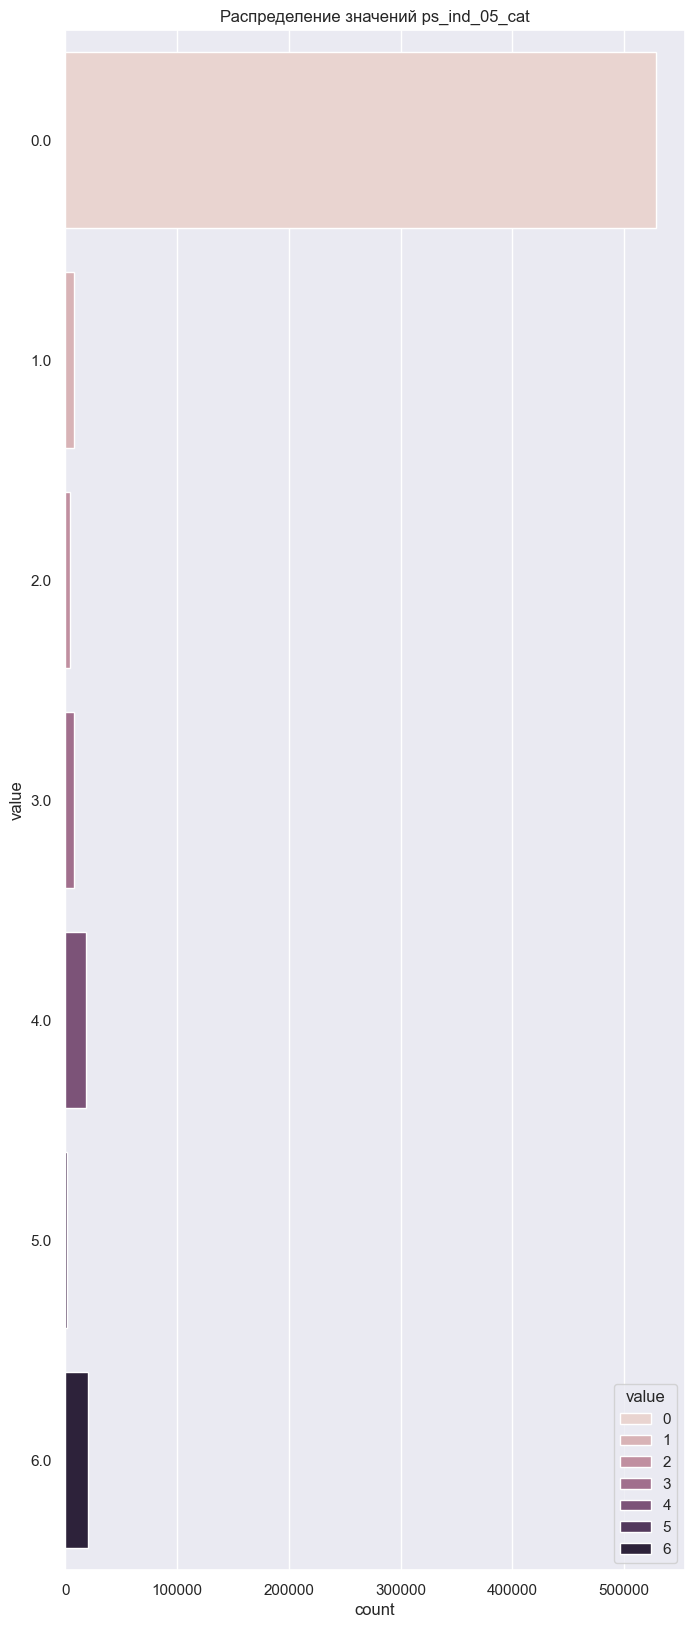

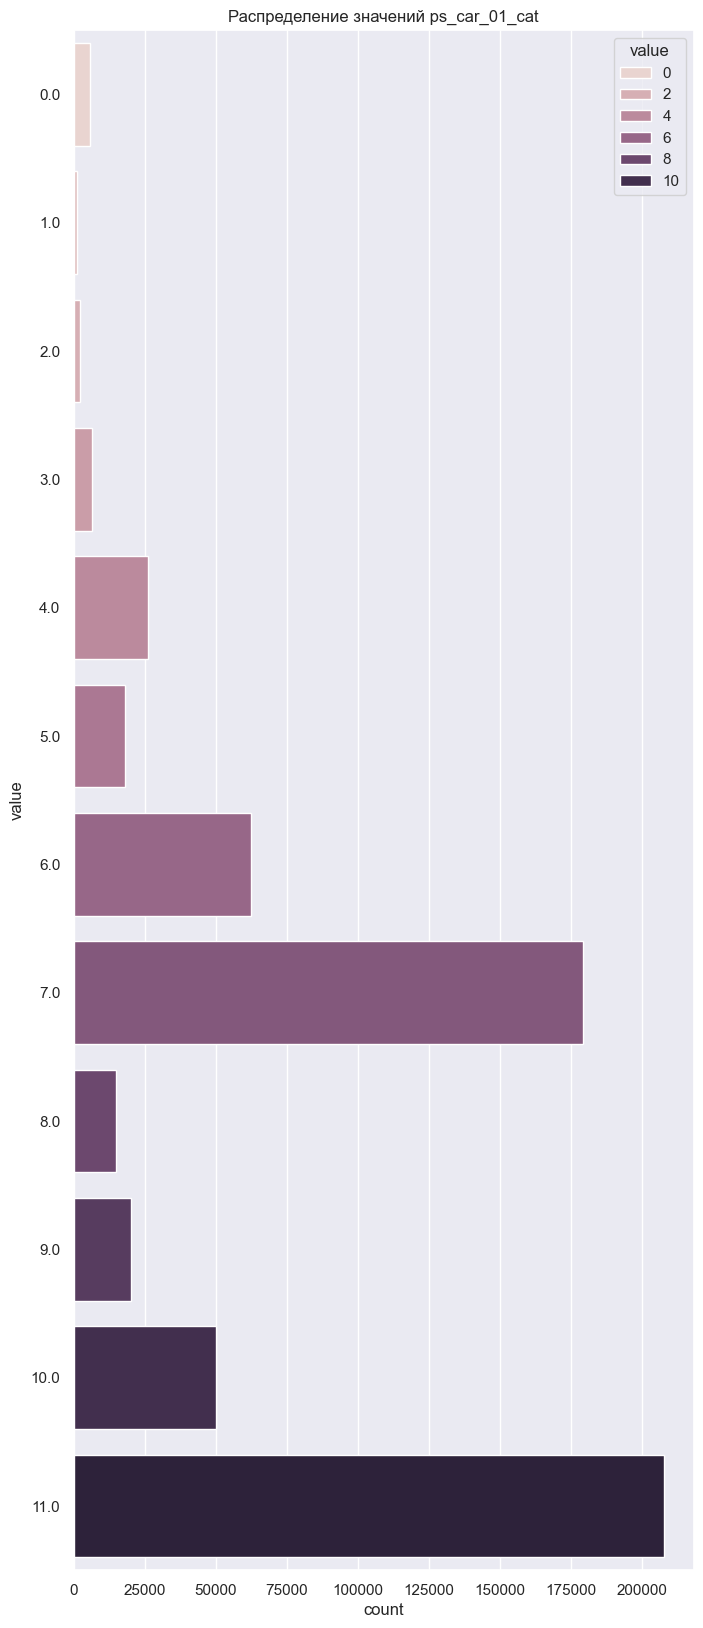

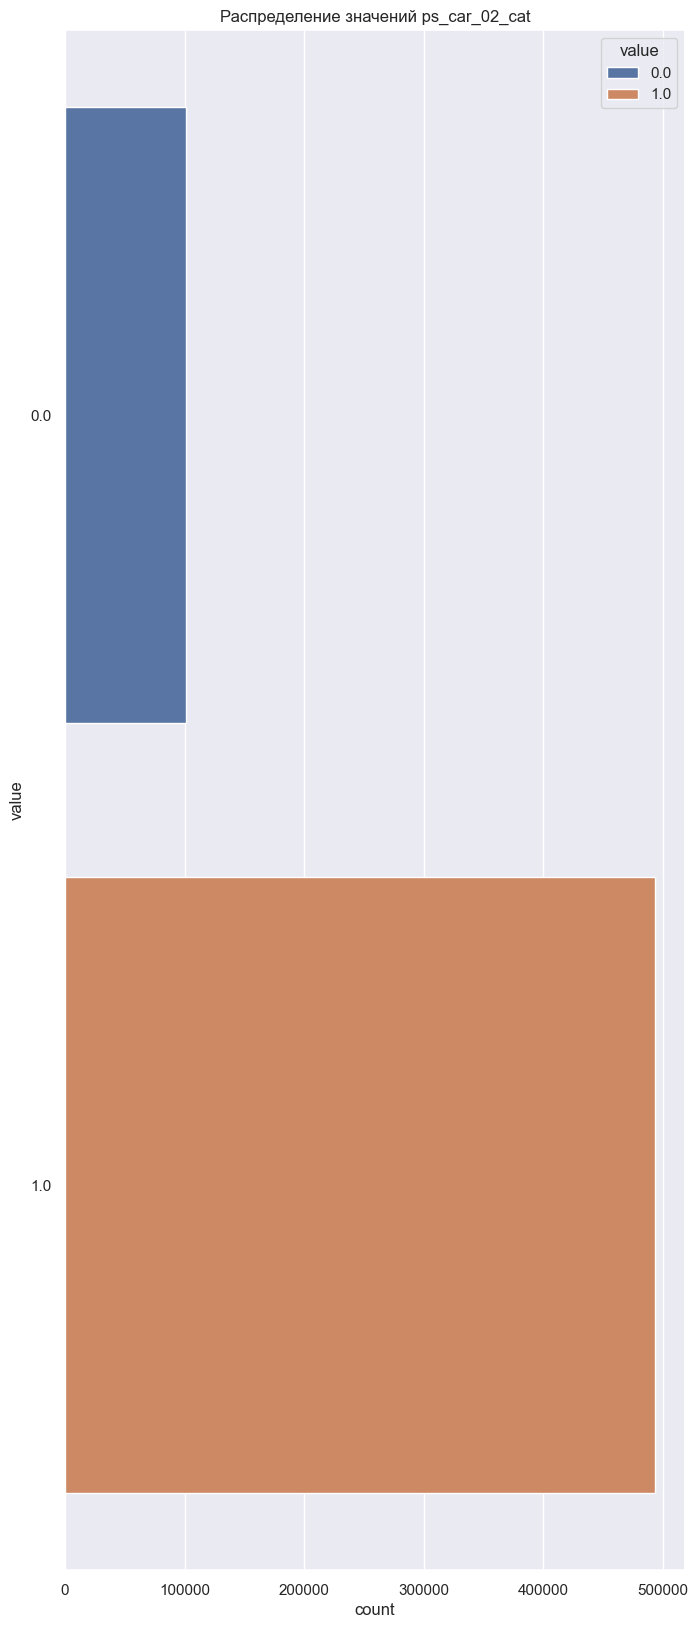

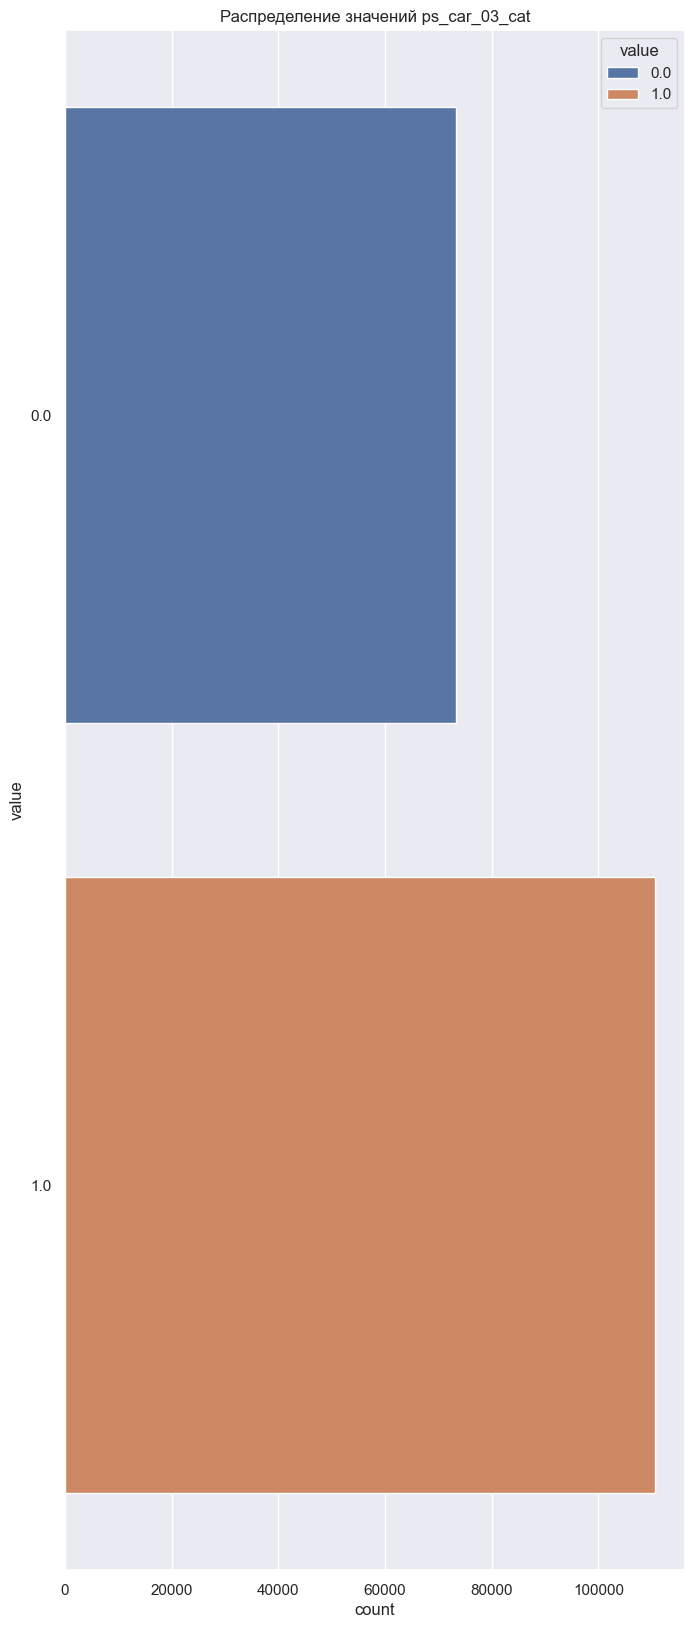

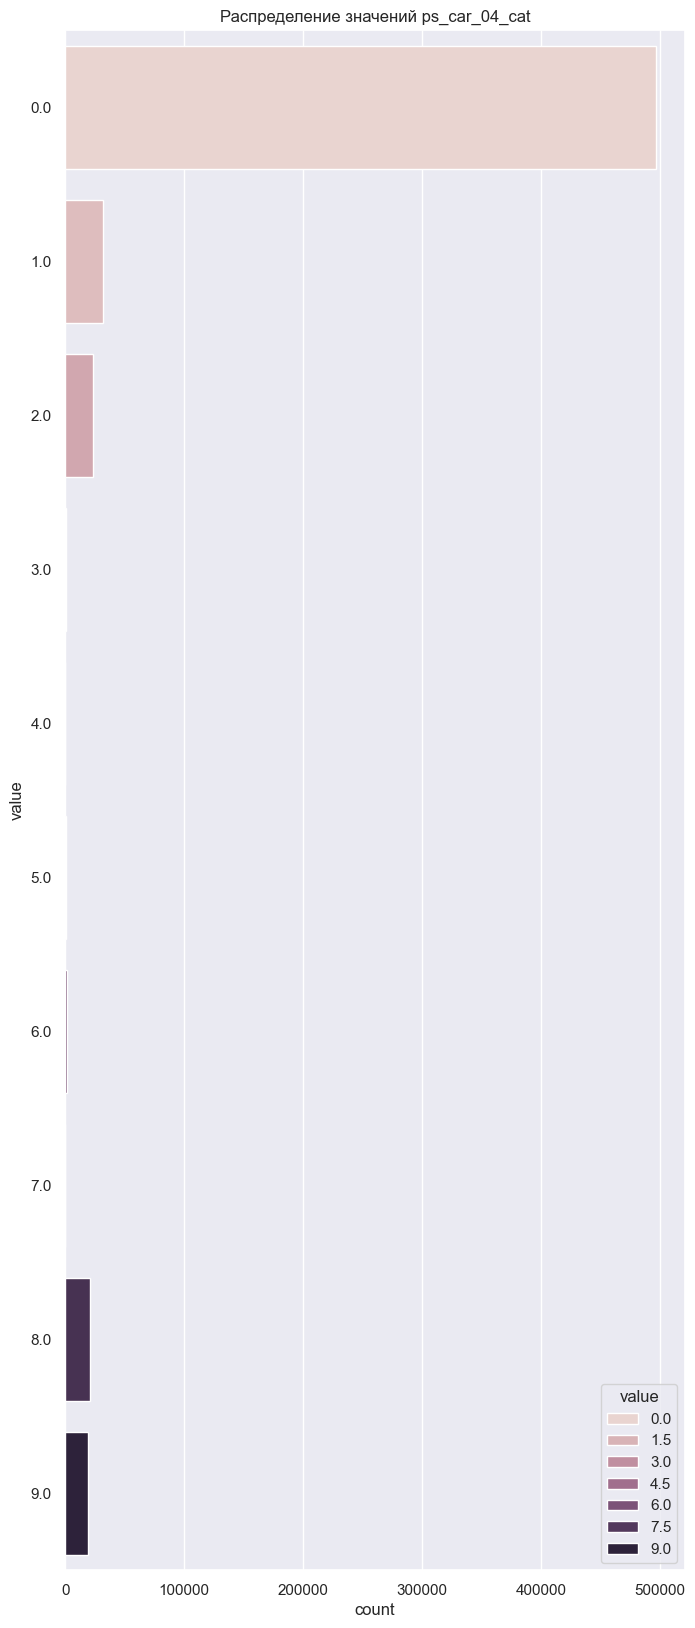

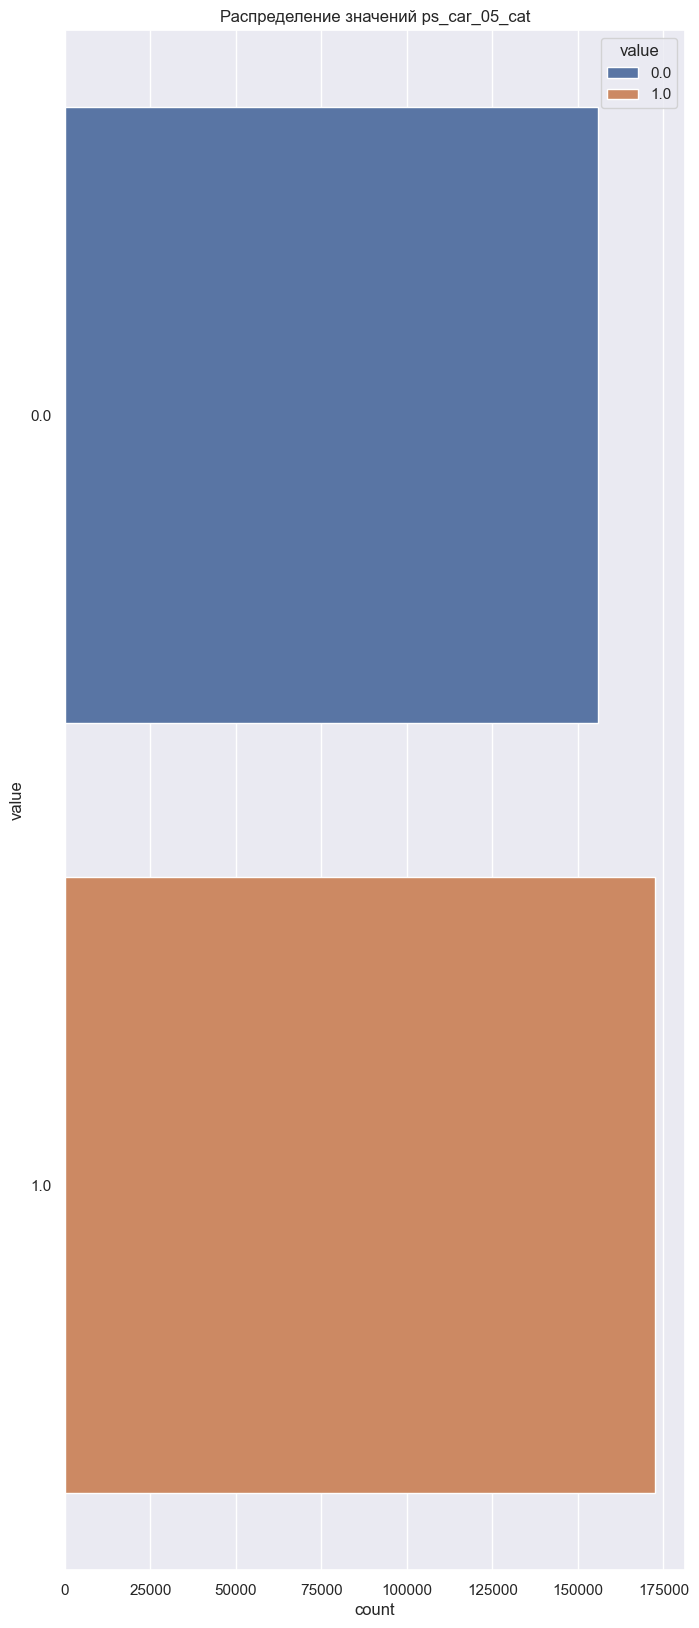

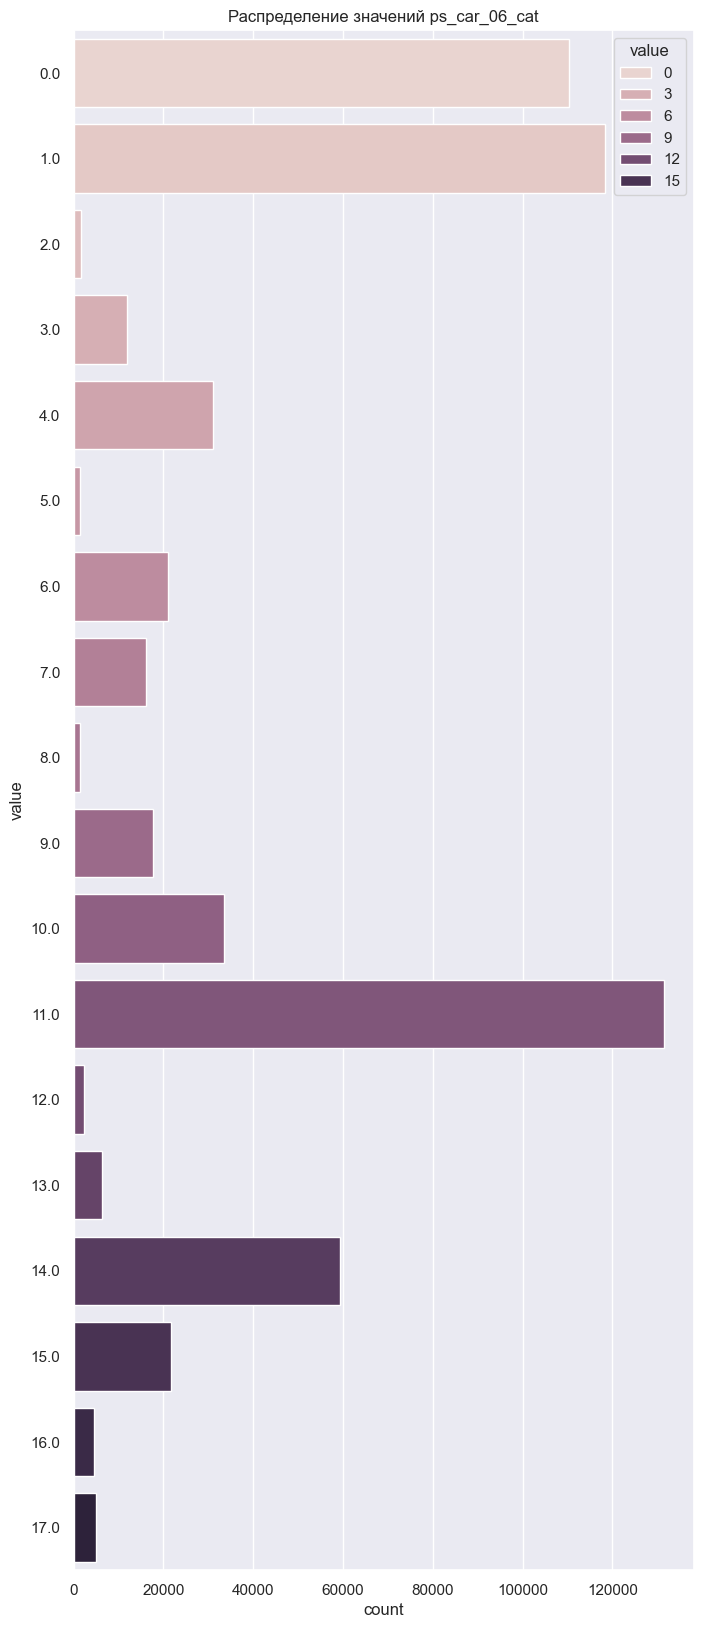

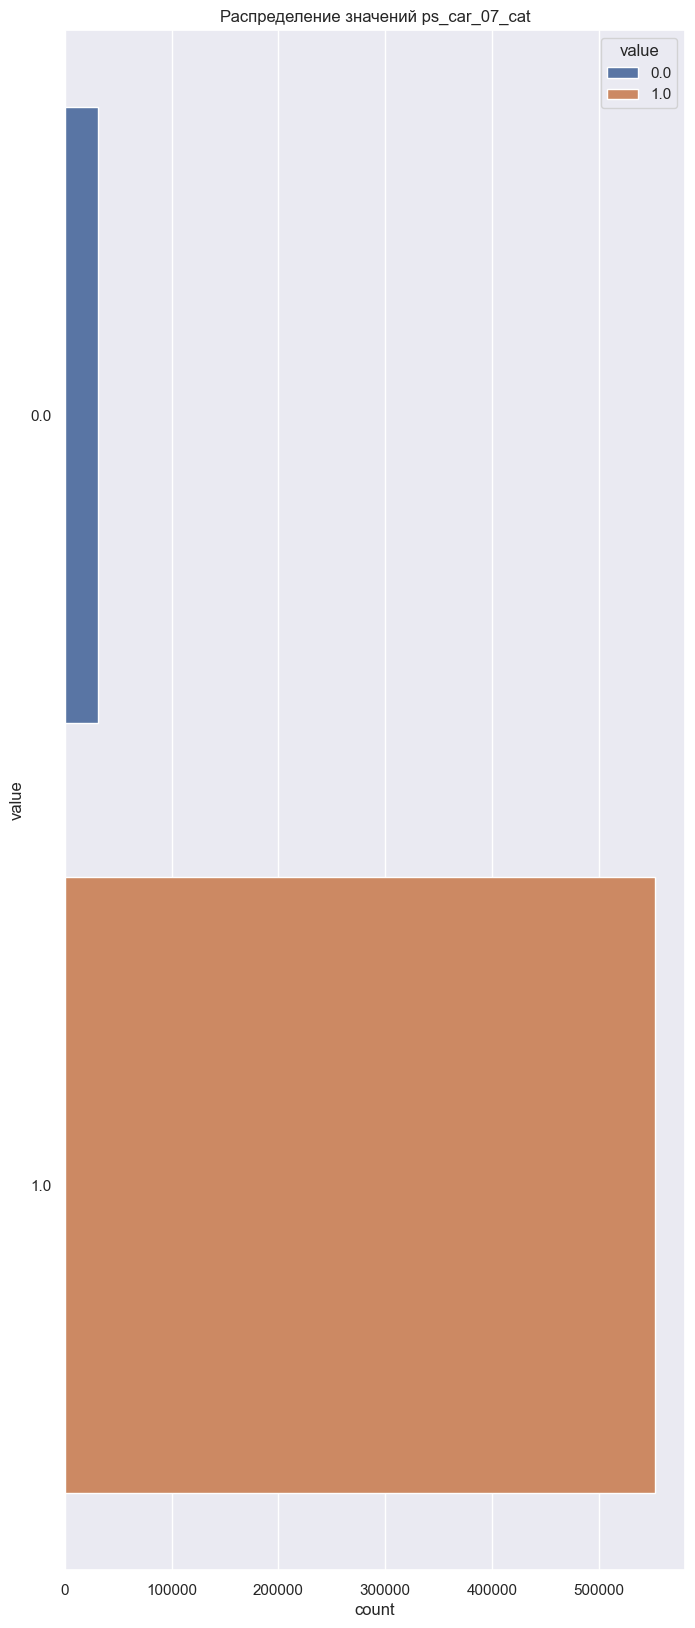

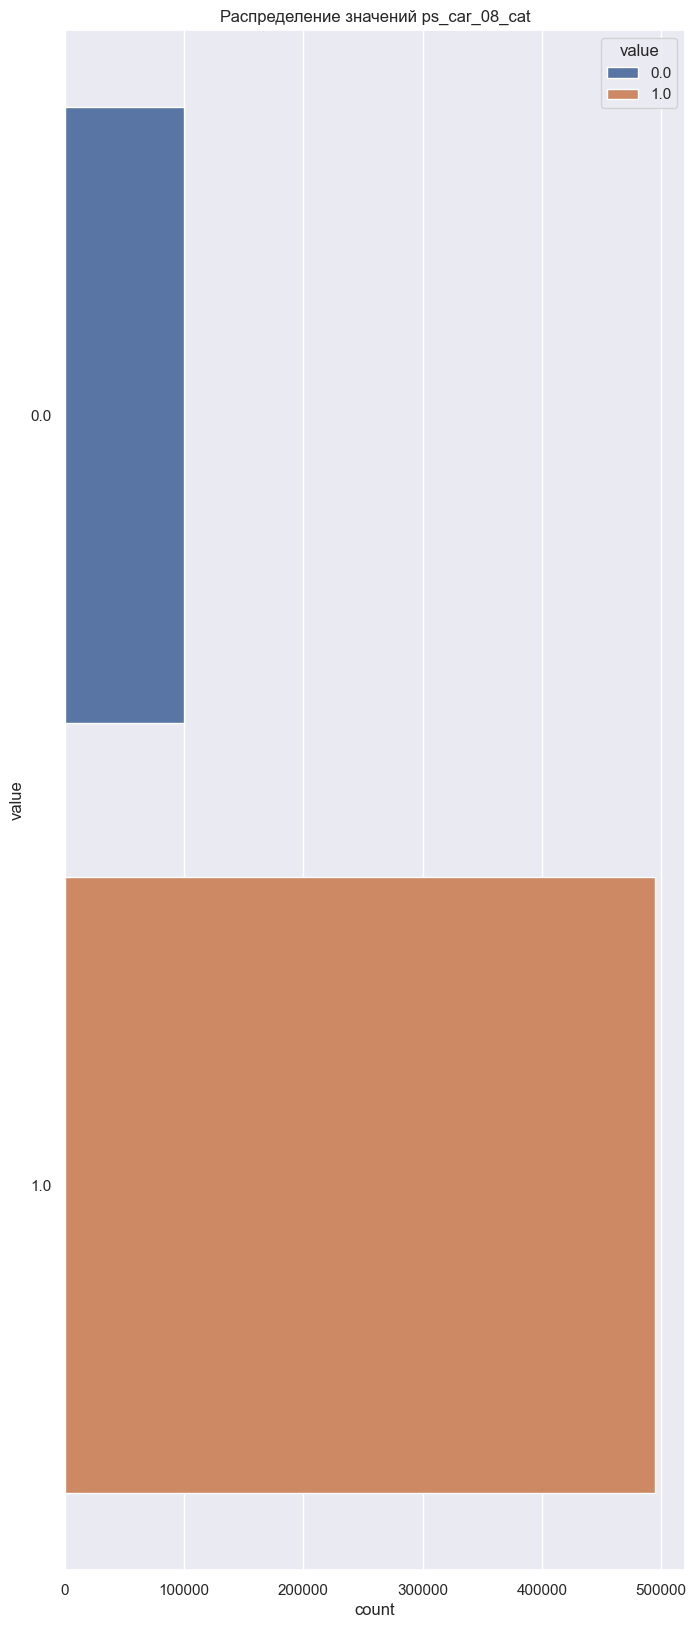

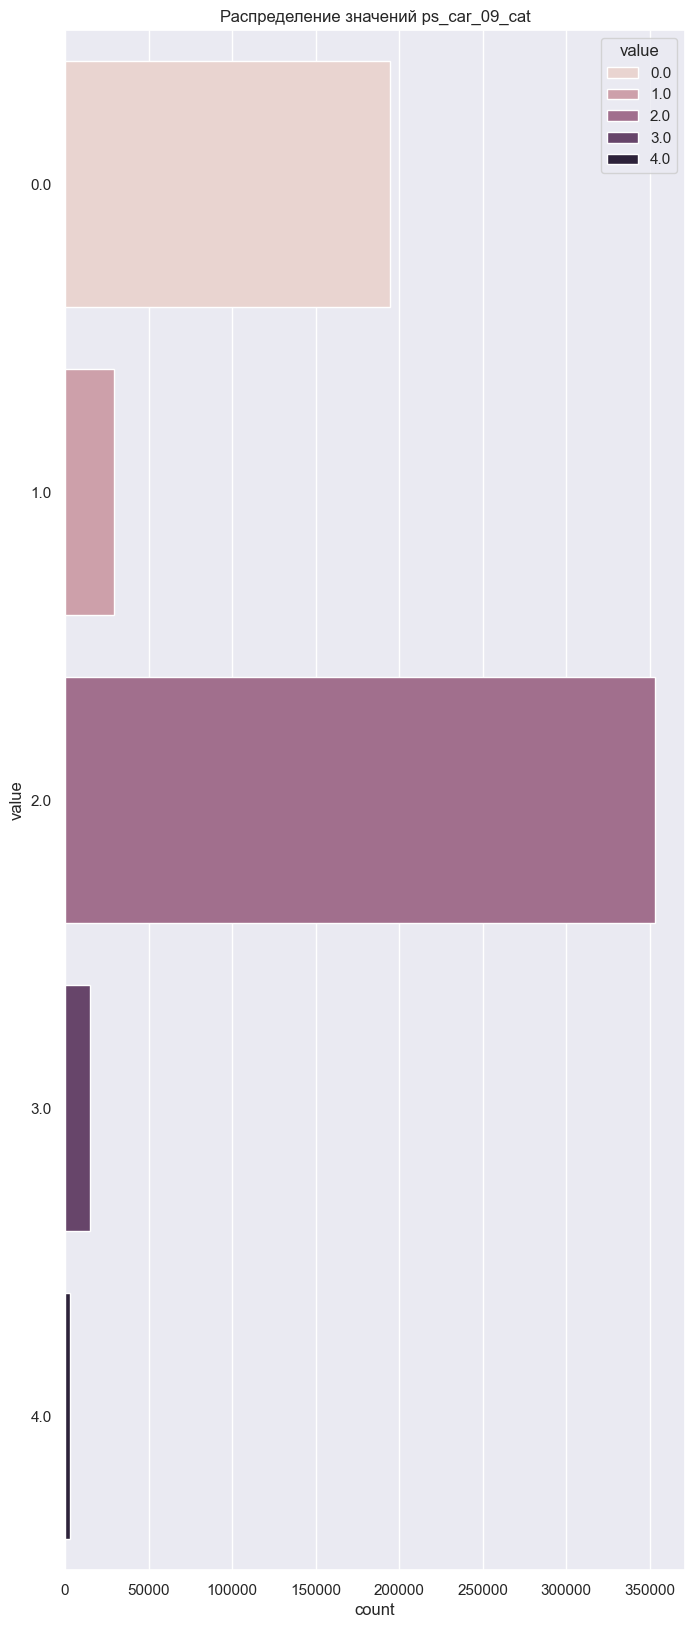

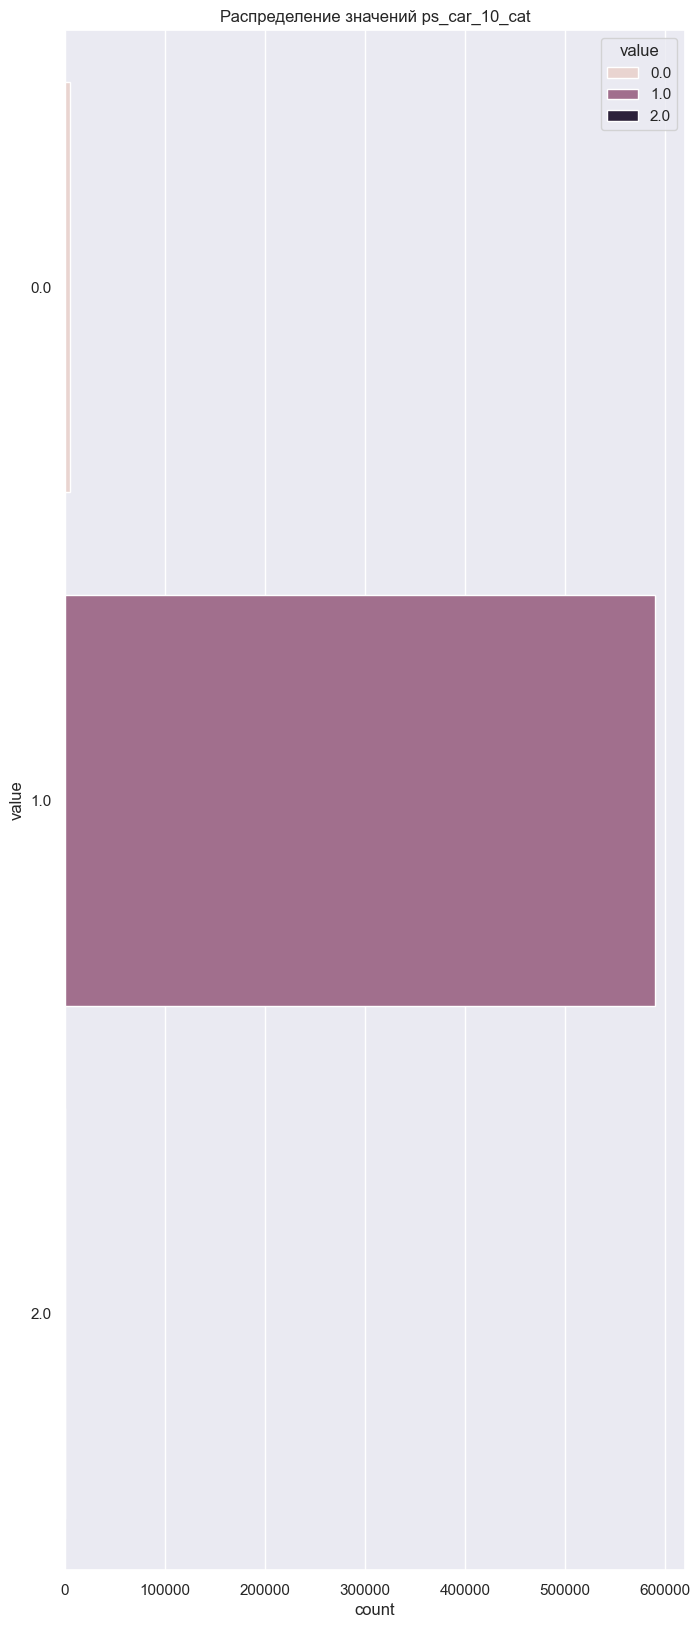

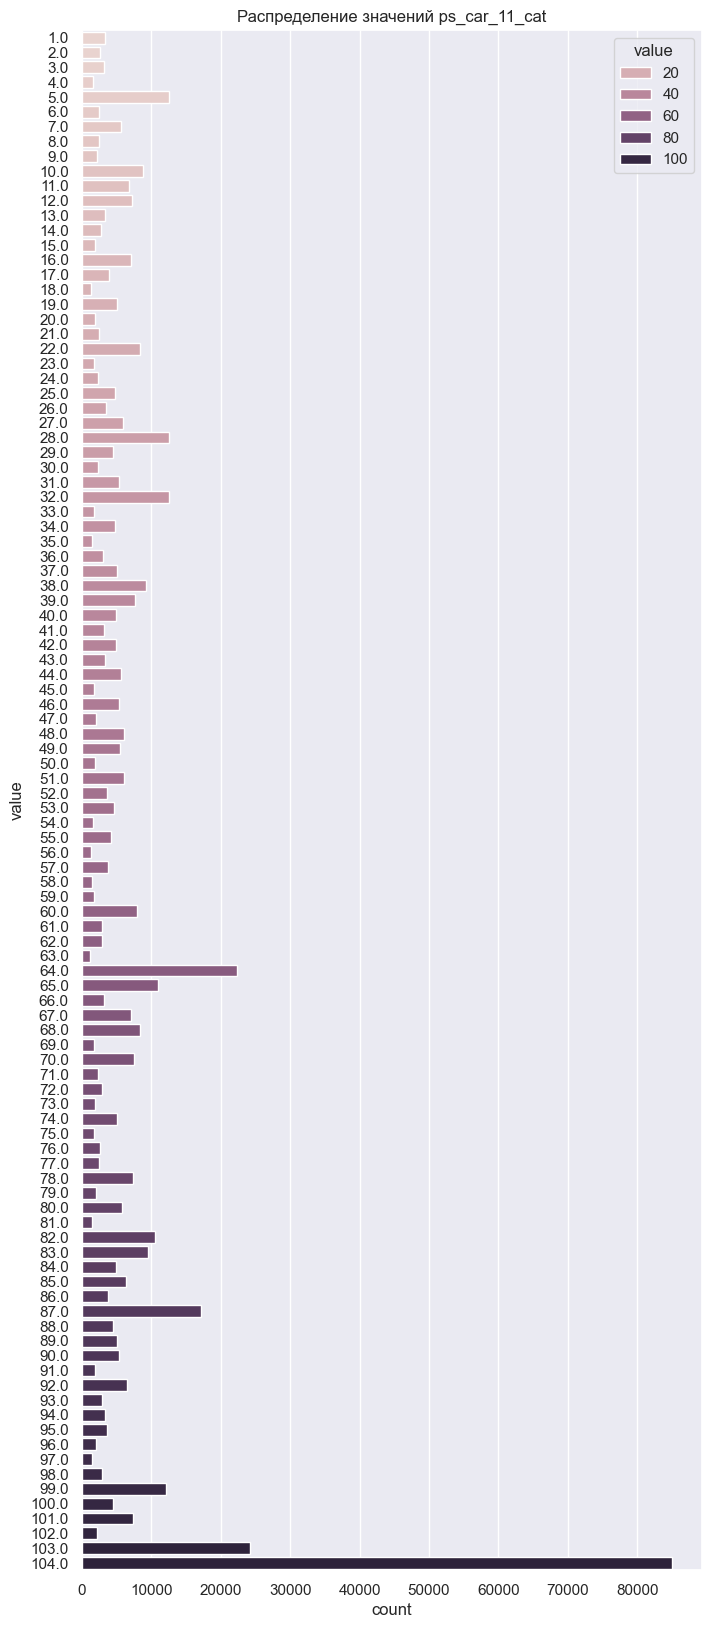

In [42]:
for feature in categorical_features:
    plt.figure(figsize=(8,20))
    sns.barplot(data=value_counts_per_feature.query(f'feature == "{feature}"'), x='count', y='value', hue='value', orient='h').set_title(
        f"Распределение значений {feature}"
    )
    plt.show()

Как видно из графиков - некоторые категориальные фичи подозрительно похожи на бинарные